In [1]:
import pyart
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
#import wradlib
%matplotlib inline

from hdf5_to_cfrad_copia import hdf5_to_cfrad

In [2]:
filename='/home/martin/RadarMeteo/datos/EZE-PPIVol-20160415-192005.hdf'

In [3]:
radar=hdf5_to_cfrad(filename)

/home/martin/RadarMeteo/datos/cfrad.20160415_192005.000_to_20160415_192005.000_EZE_SUR.nc


In [4]:
def gate_mas_cercano(r,lat=-34.966184,lon=-57.896028):
    '''
    Esta funcion toma los valores de lat/lon de la estación de La Plata Aero
    y devuelve el azimuth y rango más cercanos al punto requerido.
    
    Es necesario tener esta funcion porque la cantidad de radiales cambia
    para cada volumen y elevacion.
    
    Parametros
    ----------
    r : Radar
        Objeto radar, preferentemente de la primera elevación,
        r=radar.extract_sweeps([0])
    lat : float
        latitud del punto deseado
    lon : float
        longitud del punto deseado
        
    Devuelve
    --------
    min_azi: int
        Indice del azimuth más cercano al punto.
    min_rango: int
        Indice del rango más cercano al punto.
    '''
    # Esta es la ubicación de la estación/disdrómetro de La Plata Aero
    #SADL_lat=-34.966184
    #SADL_lon=-57.896028
    
    # Redondeo los arrays de lat y lon a la misma cantidad de decimales de la ubicación
    lat_round=np.around(r.gate_latitude['data'],6)
    lon_round=np.around(r.gate_longitude['data'],6)
    
    # Para encontrar el gate más cercano
    suma_lat_lon=np.add((lon_round-lon)**2,(lat_round-lat)**2)
    
    min_index= suma_lat_lon.argmin()
    #min_azi,min_rango=np.where(suma_lat_lon == suma_lat_lon.min())
    
    return np.unravel_index(min_index, r.fields['TH']['data'].shape)

    #min_azi, min_rango=min_azi[0], min_rango[0]
    #print min_azi, min_rango
    
    #return min_azi, min_rango

r=radar.extract_sweeps([0])
min_azi, min_rango=gate_mas_cercano(r)

lat_mas_cercano=r.gate_latitude['data'][min_azi][min_rango]
lon_mas_cercano=r.gate_longitude['data'][min_azi][min_rango]

print lat_mas_cercano, lon_mas_cercano

-34.9604232831 -57.8958623178


/home/martin/anaconda2/lib/python2.7/site-packages/pyart/core/transforms.py:626: RuntimeWarning: invalid value encountered in divide
  y * np.sin(c) * np.cos(lat_0_rad) / rho)


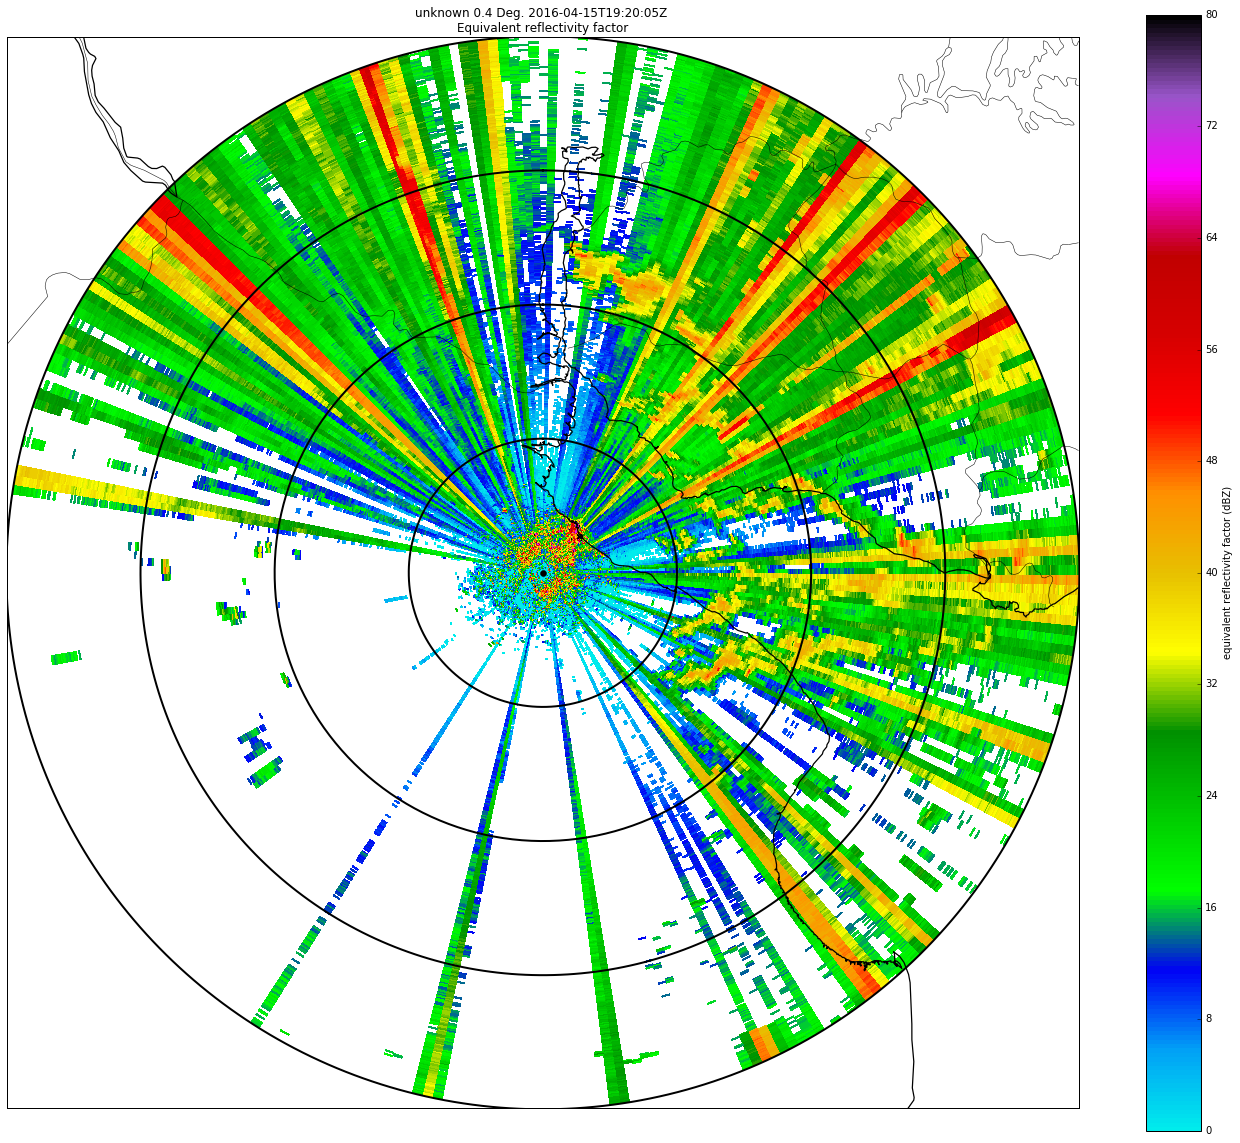

In [13]:
r.fields['TH']['data'][min_azi][min_rango]=65

display = pyart.graph.RadarMapDisplay(r)
fig =plt.figure(figsize=(24,20))
ax = fig.add_subplot(111)
display.plot_ppi_map('TH', sweep=0, vmin=0, vmax=80, 
                     cmap=pyart.graph.cm.NWSRef, resolution='h')
display.plot_range_rings([60,120,180,240], ax=None)
display.plot_point(radar.longitude['data'][0], radar.latitude['data'][0], color='k')

#display.plot_point(lon_mas_cercano, lat_mas_cercano, color='m')


In [ ]:
from pyart.config import FileMetadata

filemetadata=FileMetadata('odim_h5')
filemetadata('radar_beam_width_h')

In [23]:
for i in range(r.nrays):
    r.fields['TH']['data'][min_azi][i]=80

In [67]:
min_azi, min_rango
a=[]
for i in range(5):
    a.append(np.ma.mean(r.fields['TH']['data'][min_azi-2:min_azi+3][i][min_rango-2:min_rango+3]))
    #print r.fields['TH']['data'][min_azi-2:min_azi+3][i][min_rango-2:min_rango+3],
    #print np.ma.mean(r.fields['TH']['data'][min_azi-2:min_azi+3][i][min_rango-2:min_rango+3])
    

np.ma.mean(a)

#r.fields['TH']['data'][min_azi-1:min_azi+2][0][min_rango-1:min_rango+2]

/home/martin/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/martin/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:68: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


masked_array(data = nan,
             mask = False,
       fill_value = 1e+20)